In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px

In [3]:
pd.set_option('display.max_rows', None)

In [4]:
final_villagers= pd.read_csv('villagers_final.csv')

In [5]:
final_villagers.drop(columns = ['Unnamed: 0'],inplace = True)

In [6]:
final_villagers.head()

,Name,Species,Personality,Hobby,Astrology,Genre,Style 1,Style 2,Color 1,Color 2,Total_Google_Searches,Poll_Results,Overall_Popularity
0,Admiral,Bird,Cranky,Nature,Aquarius,Pop,Cool,Cool,Black,Blue,2417200.0,632.0,2417832.0
1,Agent S,Squirrel,Peppy,Fitness,Cancer,Pop,Active,Simple,Blue,Black,2664010.0,1225.0,2665235.0
2,Agnes,Pig,Big Sister,Play,Taurus,Electronic,Simple,Elegant,Pink,White,4731450.0,2535.0,4733985.0
3,Al,Gorilla,Lazy,Fitness,Libra,Pop,Active,Active,Red,White,1618750.0,600.0,1619350.0
4,Alfonso,Alligator,Lazy,Play,Gemini,Folk,Simple,Simple,Red,Blue,913600.0,1230.0,914830.0


In [7]:
final_villagers.Personality.unique()

array(['Cranky', 'Peppy', 'Big Sister', 'Lazy', 'Normal', 'Snooty',
       'Jock', 'Smug'], dtype=object)

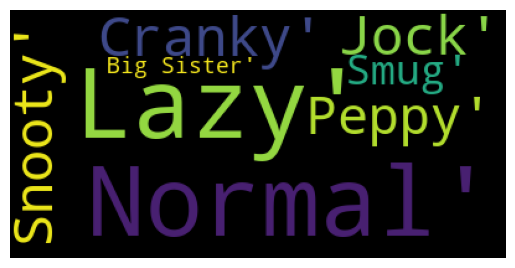

In [8]:
text = final_villagers['Personality'].values 

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [9]:
top15overall=final_villagers.sort_values(by =['Overall_Popularity'], ascending = False)[0:14]

In [10]:
top15overall.head()

,Name,Species,Personality,Hobby,Astrology,Genre,Style 1,Style 2,Color 1,Color 2,Total_Google_Searches,Poll_Results,Overall_Popularity
87,Clay,Hamster,Lazy,Nature,Libra,World,Elegant,Simple,Beige,Brown,19218150.0,3425.0,19221575.0
256,Olive,Cub,Normal,Nature,Cancer,Folk,Simple,Simple,Brown,Yellow,12937100.0,751.0,12937851.0
12,Ankha,Cat,Snooty,Nature,Virgo,World,Gorgeous,Simple,Colorful,Brown,7264000.0,13038.0,7277038.0
121,Drift,Frog,Jock,Fitness,Libra,Rock,Simple,Active,Orange,Red,6695950.0,525.0,6696475.0
309,Rocket,Gorilla,Big Sister,Fitness,Aries,Folk,Active,Cool,Pink,Red,6068350.0,329.0,6068679.0


In [11]:
top15ACPPoll=final_villagers.sort_values(by =['Poll_Results'], ascending = False)[0:14]

In [12]:
top15ACPPoll.head()

,Name,Species,Personality,Hobby,Astrology,Genre,Style 1,Style 2,Color 1,Color 2,Total_Google_Searches,Poll_Results,Overall_Popularity
228,Marshal,Squirrel,Smug,Music,Libra,Latin,Elegant,Cool,Light blue,Blue,1136850.0,29787.0,1166637.0
298,Raymond,Cat,Smug,Nature,Libra,Funk,Elegant,Cool,Black,Gray,4906350.0,27778.0,4934128.0
329,Sherb,Goat,Lazy,Nature,Capricorn,Electronic,Simple,Cute,Gray,Blue,5608850.0,19883.0,5628733.0
390,Zucker,Octopus,Lazy,Nature,Pisces,Folk,Simple,Cute,Blue,Yellow,2512500.0,17442.0,2529942.0
186,Judy,Cub,Snooty,Music,Pisces,Children's Music,Cute,Elegant,Pink,White,4686500.0,14741.0,4701241.0


<Axes: xlabel='Poll_Results', ylabel='Total_Google_Searches'>

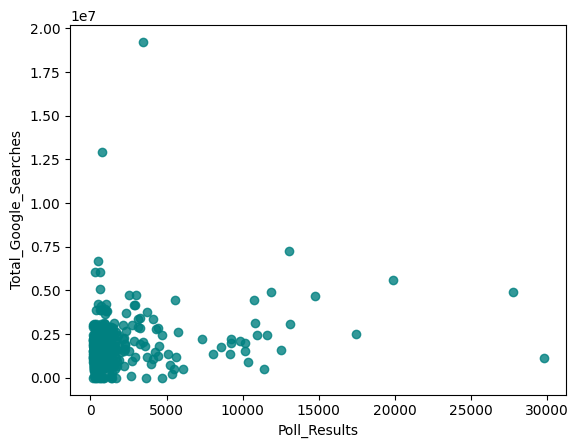

In [13]:
#sns.pairplot(FinVillagers_ACNH2)
sns.regplot(y=final_villagers["Total_Google_Searches"], x=final_villagers["Poll_Results"],
           color='teal',fit_reg=False)
#sns.plt.show()

In [14]:
personality_species = final_villagers.groupby(['Species', 'Personality'])['Overall_Popularity'].sum().unstack().fillna(0)

In [15]:
personality_species

Personality,Big Sister,Cranky,Jock,Lazy,Normal,Peppy,Smug,Snooty
Species,,,,,,,,
Alligator,0.0,1086648.0,3717833.0,4059309.0,1807134.0,0.0,0.0,2022403.0
Anteater,0.0,1769126.0,526085.0,0.0,2080636.0,5012798.0,1944223.0,2994871.0
Bear,4624252.0,8637966.0,1813437.0,2225242.0,2786335.0,3494773.0,1928902.0,0.0
Bird,0.0,2417832.0,4009982.0,6410224.0,1738875.0,3683394.0,2921832.0,78828.0
Bull,0.0,3852603.0,1879055.0,3175378.0,0.0,0.0,0.0,0.0
Cat,2303274.0,6755173.0,3263189.0,2810488.0,5523681.0,7368853.0,4934128.0,15259796.0
Chicken,4198743.0,773626.0,502220.0,3575690.0,2590344.0,0.0,568193.0,2612342.0
Cow,0.0,0.0,0.0,0.0,2524662.0,2598255.0,0.0,4669423.0
Cub,3006443.0,3375015.0,2420770.0,7889166.0,18096684.0,3016630.0,0.0,4701241.0


In [16]:
final_villagers['Overall_Popularity'] = final_villagers[['Overall_Popularity']].astype('int64')

In [17]:
personality_overall = final_villagers.groupby(['Personality'])
personality_overall = personality_overall[['Overall_Popularity']].sum().add_prefix('Sum_of_')

In [18]:
personality_overall

,Sum_of_Overall_Popularity
Personality,
Big Sister,55466139
Cranky,91762446
Jock,99641958
Lazy,130585526
Normal,122477521
Peppy,91630604
Smug,56405235
Snooty,94506116


In [19]:
personality_overall.apply(lambda x: x/x.sum()).reset_index() # type: ignore

,Personality,Sum_of_Overall_Popularity
0,Big Sister,0.074704
1,Cranky,0.123590
2,Jock,0.134202
3,Lazy,0.175879
4,Normal,0.164958
5,Peppy,0.123412
6,Smug,0.075969
7,Snooty,0.127285


Text(0.5, 0, 'Species and Personality')

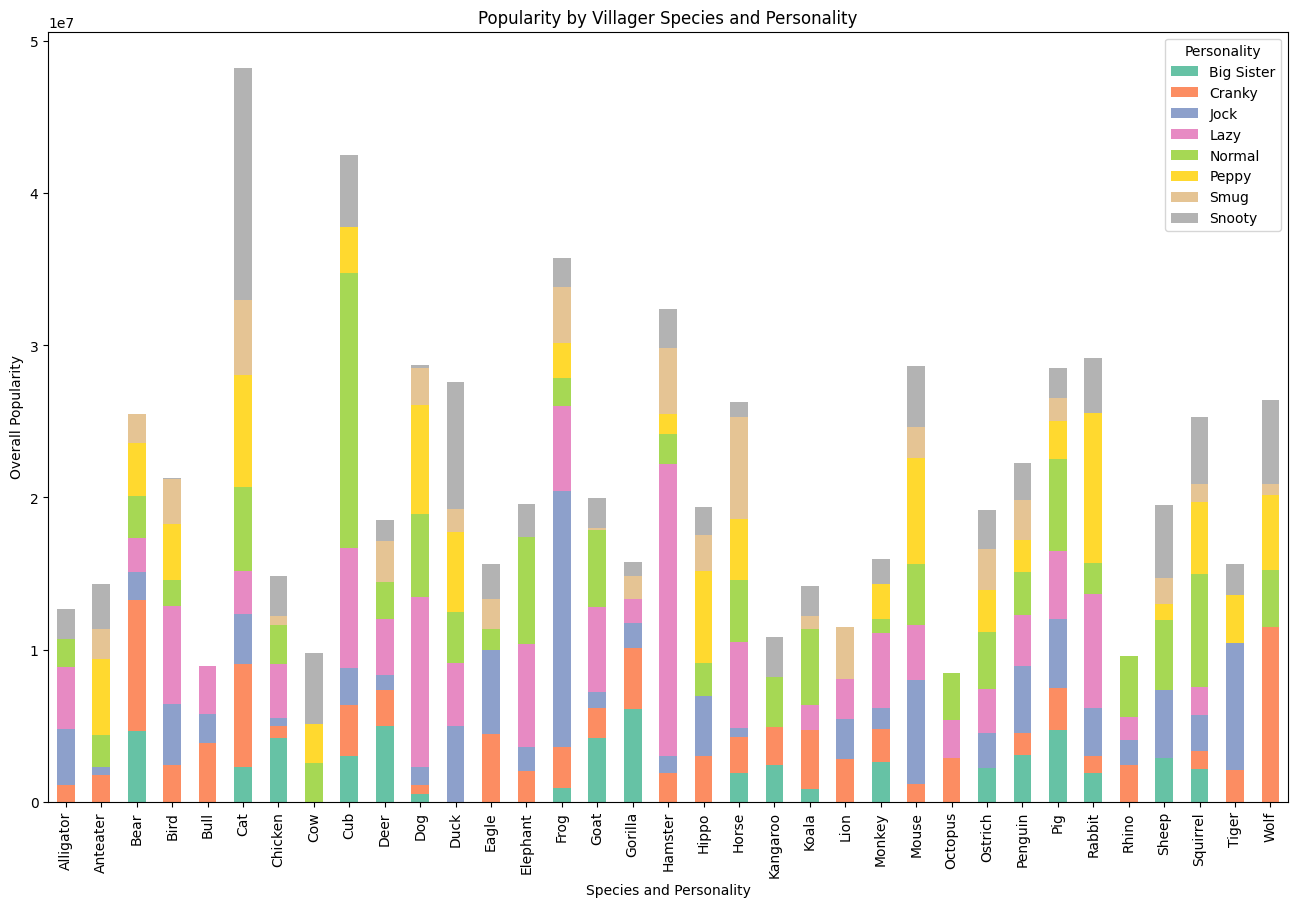

In [20]:
# Very simple one-liner using our agg_tips DataFrame.
personality_species.plot(kind='bar', stacked=True,figsize = (16,10),rot = 90,colormap = 'Set2',
                        grid=False,title = 'Popularity by Villager Species and Personality',
                       )

# Just add a title and rotate the x-axis labels to be horizontal.
plt.ylabel('Overall Popularity')
plt.xlabel('Species and Personality')
#plt.xticks(rotation=0, ha='center')
#plt.figure(figsize = (16,20))

In [21]:
#Stacked bar chart:
#Villager species variable [as ordinal rank/order of species x axis & gender bar stack color]
#Total rank by villager species [quantitative variable as sum on y axis]
#JS Note, they look a bit better unstacked

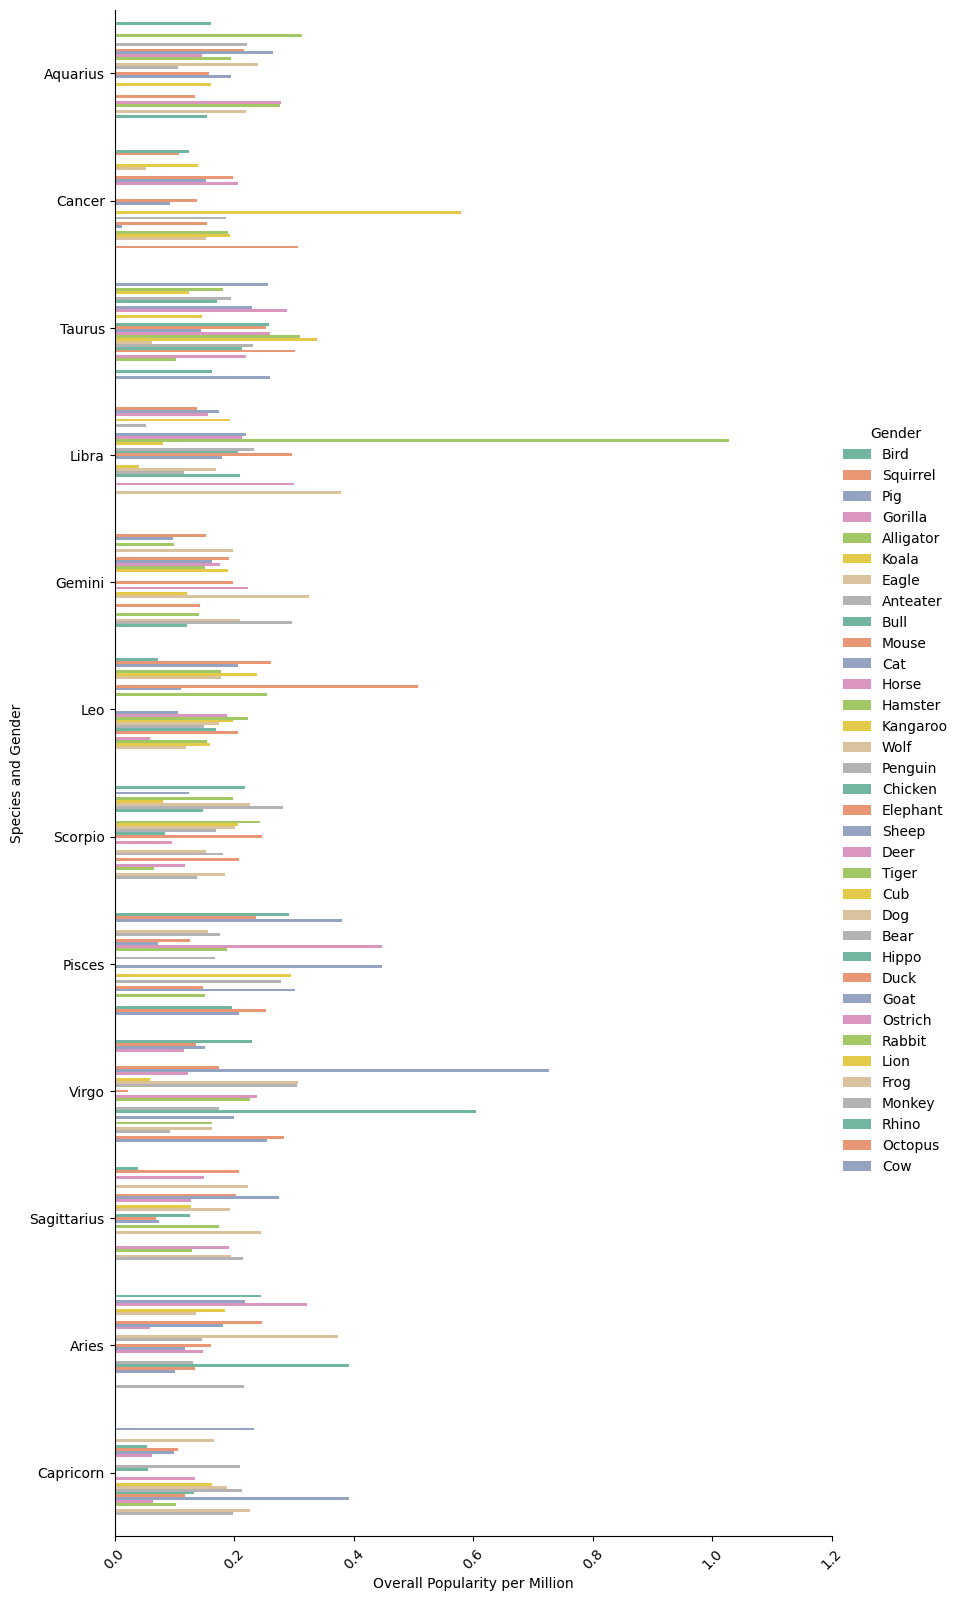

In [22]:
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=final_villagers, kind="bar",
    y="Astrology", x="Overall_Popularity", hue="Species",
    #order=Final_Villagers_ACNH.sort_values('Species',ascending = False).Overall_Popularity,
    errorbar=None,palette="Set2", alpha=1, height=16,aspect=14.7/27.27
)
#g.despine(right=True)
#g.title('Overall Popularity from combined Historical Google Searches and ACP Poll Results by Species and Gender')
g.set_axis_labels("Overall Popularity per Million", "Species and Gender")
g.legend.set_title("Gender")
g.set_xticklabels(rotation=45)
#plt.xticks(rotation=45)
#sns.set(rc={'figure.figsize':(40.7,20.27)})

In [23]:
species_astro = final_villagers.groupby(['Species','Astrology'])['Overall_Popularity'].sum().unstack().fillna(0)

In [24]:
species_astro

Astrology,Aquarius,Aries,Cancer,Capricorn,Gemini,Leo,Libra,Pisces,Sagittarius,Scorpio,Taurus,Virgo
Species,,,,,,,,,,,,
Alligator,3144479.0,0.0,0.0,0.0,2001478.0,1785643.0,0.0,0.0,0.0,3954593.0,1807134.0,0.0
Anteater,4441687.0,0.0,0.0,0.0,0.0,0.0,526085.0,1769126.0,0.0,5646618.0,1944223.0,0.0
Bear,0.0,3918535.0,3731490.0,2133521.0,0.0,2997874.0,2314535.0,2786335.0,0.0,1818794.0,2315050.0,3494773.0
Bird,3228014.0,2448853.0,3741610.0,0.0,0.0,728688.0,0.0,5843267.0,789606.0,2175097.0,0.0,2305832.0
Bull,0.0,0.0,0.0,542663.0,0.0,0.0,0.0,0.0,0.0,1486892.0,6877481.0,0.0
Cat,5303926.0,5455462.0,1522781.0,2004869.0,3257755.0,3315090.0,8823551.0,721530.0,8233306.0,0.0,2303274.0,7277038.0
Chicken,0.0,0.0,0.0,568193.0,0.0,0.0,8276653.0,0.0,2540375.0,845593.0,2590344.0,0.0
Cow,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2090087.0,0.0,0.0,2598255.0,5103998.0
Cub,1610048.0,0.0,17402809.0,3259823.0,3620551.0,3972030.0,414780.0,8841453.0,0.0,0.0,3384455.0,0.0


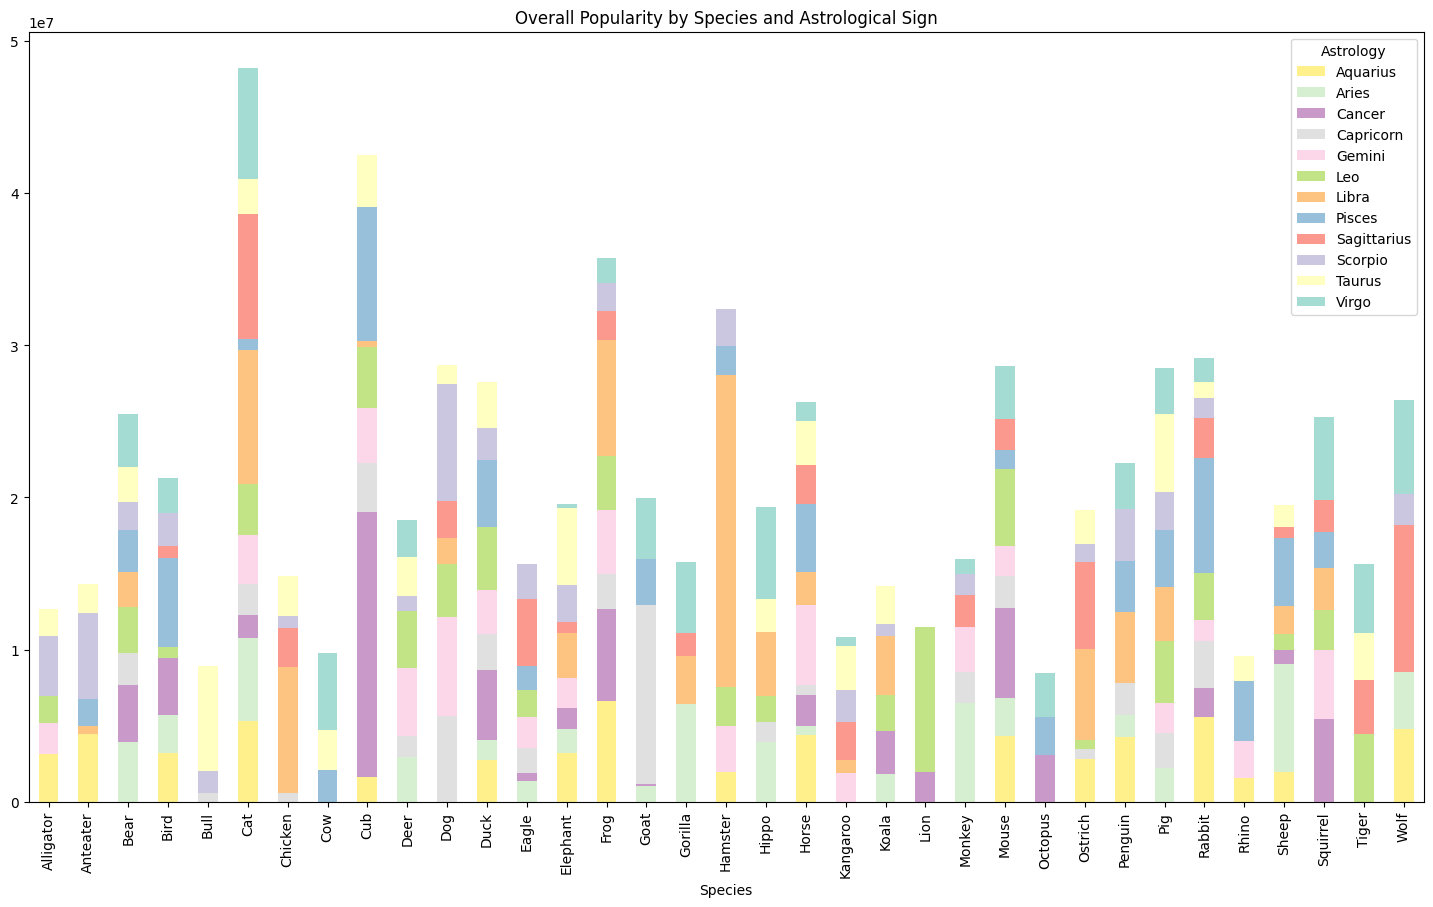

In [25]:
# Draw a nested barplot by species and sex
gv2 = species_astro.plot(
    kind="bar",stacked=True,
    alpha=0.8,colormap = 'Set3_r',
    title = 'Overall Popularity by Species and Astrological Sign',
    figsize = (18,10), grid = False
)
#g.despine(right=True)
#g.title('Overall Popularity from combined Historical Google Searches and ACP Poll Results by Species and Gender')
#gv2.set_axis_labels("Overall Popularity per Million", "Species and Gender")
#gv2.legend.set_title("Gender")
#gv2.set_xticklabels(rotation=45)
#plt.xticks(rotation=45)
#sns.set(rc={'figure.figsize':(40.7,20.27)})

In [26]:
personality_astro = final_villagers.groupby(['Personality','Astrology'])['Overall_Popularity'].sum().unstack().fillna(0)

In [27]:
species_astro = final_villagers.groupby(['Species','Astrology'])['Overall_Popularity'].sum().unstack().fillna(0)

In [28]:
species_astro

Astrology,Aquarius,Aries,Cancer,Capricorn,Gemini,Leo,Libra,Pisces,Sagittarius,Scorpio,Taurus,Virgo
Species,,,,,,,,,,,,
Alligator,3144479.0,0.0,0.0,0.0,2001478.0,1785643.0,0.0,0.0,0.0,3954593.0,1807134.0,0.0
Anteater,4441687.0,0.0,0.0,0.0,0.0,0.0,526085.0,1769126.0,0.0,5646618.0,1944223.0,0.0
Bear,0.0,3918535.0,3731490.0,2133521.0,0.0,2997874.0,2314535.0,2786335.0,0.0,1818794.0,2315050.0,3494773.0
Bird,3228014.0,2448853.0,3741610.0,0.0,0.0,728688.0,0.0,5843267.0,789606.0,2175097.0,0.0,2305832.0
Bull,0.0,0.0,0.0,542663.0,0.0,0.0,0.0,0.0,0.0,1486892.0,6877481.0,0.0
Cat,5303926.0,5455462.0,1522781.0,2004869.0,3257755.0,3315090.0,8823551.0,721530.0,8233306.0,0.0,2303274.0,7277038.0
Chicken,0.0,0.0,0.0,568193.0,0.0,0.0,8276653.0,0.0,2540375.0,845593.0,2590344.0,0.0
Cow,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2090087.0,0.0,0.0,2598255.0,5103998.0
Cub,1610048.0,0.0,17402809.0,3259823.0,3620551.0,3972030.0,414780.0,8841453.0,0.0,0.0,3384455.0,0.0


In [29]:
personality_astro

Astrology,Aquarius,Aries,Cancer,Capricorn,Gemini,Leo,Libra,Pisces,Sagittarius,Scorpio,Taurus,Virgo
Personality,,,,,,,,,,,,
Big Sister,1957045.0,11161060.0,5844293.0,6301475.0,1867187.0,0.0,5098367.0,0.0,0.0,0.0,15639867.0,7596845.0
Cranky,5824366.0,3653697.0,5618277.0,4299818.0,12265495.0,11211908.0,5388640.0,5222271.0,18290713.0,5992639.0,6100122.0,7894500.0
Jock,13018326.0,7500890.0,2906777.0,5777355.0,3362858.0,16378676.0,11884156.0,6840682.0,9615005.0,10175592.0,7001428.0,5180213.0
Lazy,5696401.0,1334680.0,11037238.0,15294518.0,13476728.0,16420768.0,32425134.0,13881970.0,2604404.0,4601434.0,9161102.0,4651149.0
Normal,14612117.0,16228722.0,19458240.0,654269.0,8770903.0,4999839.0,10461524.0,17150036.0,2261801.0,8052184.0,12790556.0,7037330.0
Peppy,9326688.0,9621712.0,10107099.0,9115979.0,7518274.0,6688514.0,1340949.0,12407500.0,1472393.0,2651747.0,3627863.0,17751886.0
Smug,0.0,1638934.0,4373403.0,2067290.0,7039728.0,4062940.0,13153490.0,4478361.0,10080749.0,3246385.0,3388146.0,2875809.0
Snooty,11271844.0,5263816.0,3801471.0,4313280.0,2072397.0,7007444.0,6294529.0,6791328.0,11930927.0,15599277.0,3018900.0,17140903.0


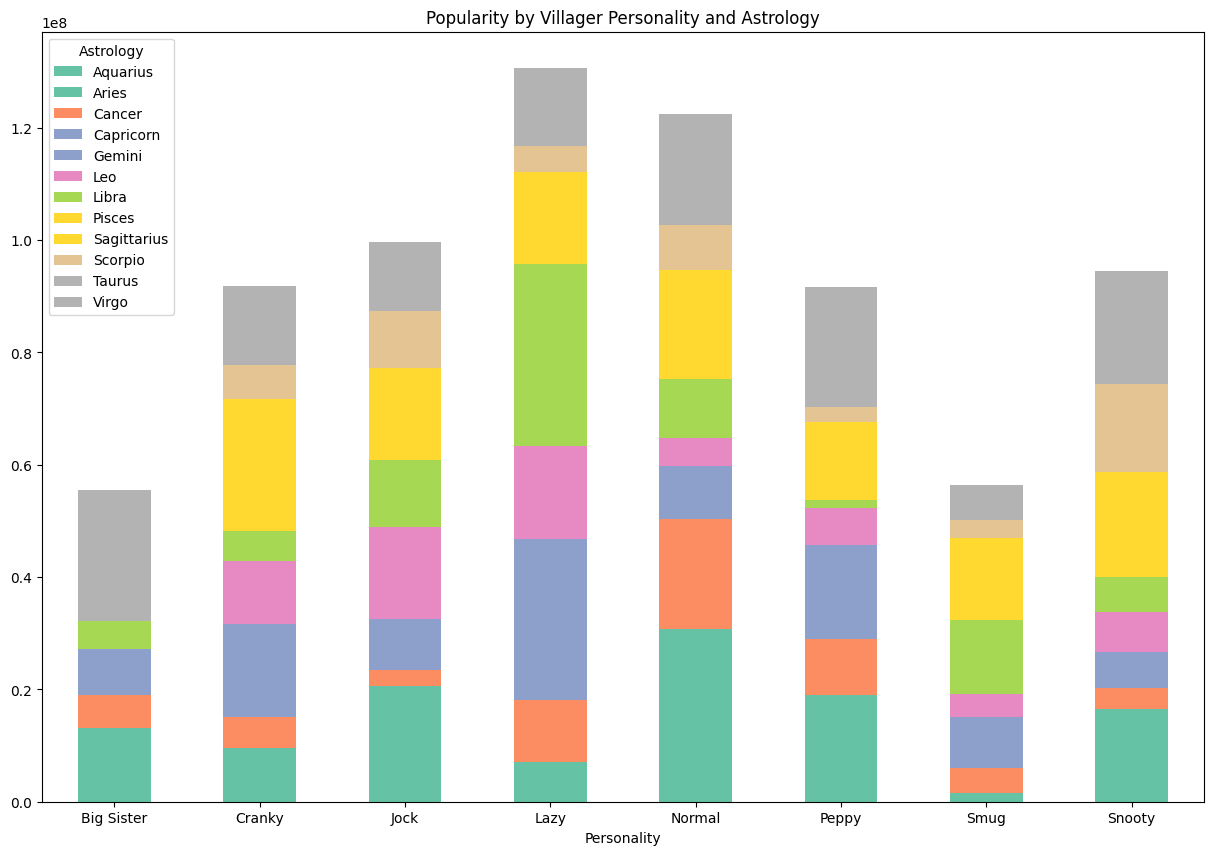

In [30]:
# Very simple one-liner using our personality_gender DataFrame.
p = personality_astro.plot(kind='bar', stacked=True,figsize = (15,10),rot = 0,
                           title = 'Popularity by Villager Personality and Astrology',
                           grid = False,colormap = 'Set2')

# Just add a title and rotate the x-axis labels to be horizontal.
#plt.xticks(rotation=0, ha='center')
#plt.figure(figsize = (10,15))
#p.sns.set(rc={'figure.figsize':(40.7,20.27)})

In [31]:
piedata = final_villagers.groupby(final_villagers['Astrology']).size().reset_index()

In [32]:
piedata = piedata.rename(columns={0:'Count'})

In [33]:
piedata.set_index("Astrology", inplace = True)

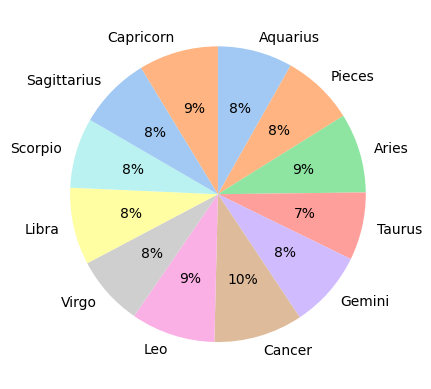

<Figure size 1600x1800 with 0 Axes>

In [34]:
#Pie chart by villager genders:
#Gender variable [nominal categorical as color & quantitative as count]

piedata1 = piedata['Count'].tolist()
labels = ['Aquarius', 'Pieces', 'Aries', 'Taurus', 'Gemini', 'Cancer', 'Leo', 'Virgo', 'Libra', 'Scorpio', 'Sagittarius', 'Capricorn']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')

#create pie chart
plt.pie(piedata1, labels = labels,counterclock=False,colors = colors, autopct='%.0f%%',
       startangle = 90)
plt.figure(figsize = (16,18))
plt.show()

In [35]:
#Bubble chart:
#Species of villagers variable [nominal categorical variable]
#Top ten villager popularity for each gender [color + size]

In [36]:
top10ACPPoll=final_villagers.sort_values(by =['Poll_Results'], ascending = False)[0:10]

In [37]:
top10google=final_villagers.sort_values(by =['Total_Google_Searches'], ascending = False)[0:10]

In [38]:
top10acplist= top10ACPPoll['Name'].tolist()
top10googlelist = top10google['Name'].tolist()

In [39]:
merge10list= top10acplist + top10googlelist
merge10finallist= set(merge10list)
mergelistdf= pd.DataFrame(merge10finallist)

In [40]:
final_overallpop_df = mergelistdf.merge(final_villagers,left_on=0,right_on='Name',how='left')

In [41]:
# !pip install --upgrade nbformat 

In [42]:
fig2 = px.bar(personality_species, color="Personality",title= "Popular Villagers: What Species are they?",
              color_discrete_sequence=px.colors.qualitative.Plotly_r,orientation='h')
fig2.update_traces(textfont_size=18,width=0.85)
fig2.update_layout(font=dict(size=20),title_font_size=24,legend_font_size=19,width=1000,height=600,font_family="Courier",yaxis_title="Villager Species",xaxis_title="Overall Popularity (Google Searches + ACNH Polls)")
fig2.update_layout(height=1000,width=890,autosize=False,font_family="Helvetica",plot_bgcolor='white')
fig2.update_xaxes(showgrid=False,showline=True, tickfont_size=18,ticks='outside',linecolor="black",linewidth=1.5)
fig2.update_yaxes(showgrid=False,showline=True, tickfont_size=18,ticks='outside',linecolor="black",linewidth=1.5)
fig2.update_layout(
    title={
        'text': "Popular Villagers : By Species & Personality",
        'y':0.95,
        'x':0.5})
fig2.update_layout(barmode='stack', yaxis={'categoryorder':'total ascending'})
fig2.show()

In [43]:
fig2astrospec = px.bar(species_astro, color="Astrology",title= "Popular Villagers: What Species are they?",
              color_discrete_sequence=px.colors.qualitative.Plotly_r,orientation='h')
fig2astrospec.update_traces(textfont_size=18,width=0.85)
fig2astrospec.update_layout(font=dict(size=20),title_font_size=24,legend_font_size=19,width=1000,height=600,font_family="Courier",yaxis_title="Villager Species",xaxis_title="Overall Popularity (Google Searches + ACNH Polls)")
fig2astrospec.update_layout(height=1000,width=890,autosize=False,font_family="Helvetica",plot_bgcolor='white')
fig2astrospec.update_xaxes(showgrid=False,showline=True, tickfont_size=18,ticks='outside',linecolor="black",linewidth=1.5)
fig2astrospec.update_yaxes(showgrid=False,showline=True, tickfont_size=18,ticks='outside',linecolor="black",linewidth=1.5)
fig2astrospec.update_layout(
    title={
        'text': "Popular Villagers : By Species & Astrological Sign",
        'y':0.95,
        'x':0.5})
fig2astrospec.update_layout(barmode='stack', yaxis={'categoryorder':'total ascending'})
fig2astrospec.show()

In [44]:
fig3 = px.scatter(final_overallpop_df, x="Poll_Results", y="Total_Google_Searches",size='Poll_Results', color="Personality",hover_name="Name",size_max=60,text='Name',
                  color_discrete_sequence=px.colors.qualitative.Plotly)
fig3.update_traces(textposition='bottom center',textfont_size=19)
fig3.update_layout(font=dict(size=20),height=700,width=980,autosize=False,font_family="Helvetica",plot_bgcolor='white')
fig3.update_xaxes(showgrid=False,showline=True, tickfont_size=18,ticks='outside',linecolor="black",linewidth=1.5)
fig3.update_yaxes(showgrid=False,showline=True, tickfont_size=18,ticks='outside',linecolor="black",linewidth=1.5)
fig3.update_layout(
    title={
        'text': "Top 10 Villagers by Google Searches vs ACNH Polls",
        'y':0.95,
        'x':0.5})
fig3.show()

In [45]:
fig4 = px.scatter(final_overallpop_df, x="Poll_Results", y="Total_Google_Searches",size='Poll_Results', color="Species",hover_name="Name",size_max=60,text='Name',
                  color_discrete_sequence=px.colors.qualitative.Plotly)
fig4.update_traces(textposition='bottom center',textfont_size=19)
fig4.update_layout(font=dict(size=20),height=700,width=980,autosize=False,font_family="Helvetica",plot_bgcolor='white')
fig4.update_xaxes(showgrid=False,showline=True, tickfont_size=18,ticks='outside',linecolor="black",linewidth=1.5)
fig4.update_yaxes(showgrid=False,showline=True, tickfont_size=18,ticks='outside',linecolor="black",linewidth=1.5)
fig4.update_layout(
    title={
        'text': "Top 10 Villagers by Google Searches vs ACNH Polls",
        'y':0.95,
        'x':0.5})
fig4.show()

In [46]:
astro_pers = final_villagers.groupby(['Astrology','Personality'])['Poll_Results'].count().unstack().fillna(0)

In [47]:
astro_pers

Personality,Big Sister,Cranky,Jock,Lazy,Normal,Peppy,Smug,Snooty
Astrology,,,,,,,,
Aquarius,1.0,2.0,5.0,4.0,8.0,5.0,0.0,7.0
Aries,4.0,2.0,5.0,2.0,8.0,4.0,2.0,4.0
Cancer,3.0,5.0,3.0,6.0,5.0,6.0,3.0,3.0
Capricorn,2.0,4.0,3.0,8.0,2.0,5.0,2.0,3.0
Gemini,2.0,6.0,2.0,7.0,6.0,5.0,4.0,1.0
Leo,0.0,7.0,10.0,7.0,2.0,4.0,4.0,4.0
Libra,2.0,3.0,7.0,7.0,6.0,1.0,6.0,4.0
Pisces,0.0,3.0,2.0,7.0,7.0,8.0,1.0,2.0
Sagittarius,0.0,9.0,4.0,1.0,2.0,2.0,6.0,9.0


In [48]:
fig2ast_per = px.bar(astro_pers, color="Personality",title= "Popular Villagers: What Astrological Sign are they?",
              color_discrete_sequence=px.colors.qualitative.Plotly_r,orientation='h')
fig2ast_per.update_traces(textfont_size=18,width=0.85)
fig2ast_per.update_layout(font=dict(size=20),title_font_size=24,legend_font_size=19,width=1000,height=600,font_family="Courier",
                          yaxis_title="Astrological Sign",
                          xaxis_title="Count of Villagers in ACNH")
fig2ast_per.update_layout(height=1000,width=890,autosize=False,font_family="Helvetica",plot_bgcolor='white')
fig2ast_per.update_xaxes(showgrid=False,showline=True, tickfont_size=18,ticks='outside',linecolor="black",linewidth=1.5)
fig2ast_per.update_yaxes(showgrid=False,showline=True, tickfont_size=18,ticks='outside',linecolor="black",linewidth=1.5)
fig2ast_per.update_layout(
    title={
        'text': "Popular Villagers : By Personality & Astrology",
        'y':0.95,
        'x':0.5})
fig2ast_per.update_layout(barmode='stack', yaxis={'categoryorder':'total ascending'})
fig2ast_per.show()

In [49]:
fig2astro = px.bar(personality_astro, color="Astrology",title= "Popular Villagers: What Astrological Sign are they?",
              color_discrete_sequence=px.colors.qualitative.Plotly_r,orientation='h')
fig2astro.update_traces(textfont_size=18,width=0.85)
fig2astro.update_layout(font=dict(size=20),title_font_size=24,legend_font_size=19,width=1000,height=600,font_family="Courier",yaxis_title="Villager Personality",xaxis_title="Overall Popularity (Google Searches + ACNH Polls)")
fig2astro.update_layout(height=1000,width=890,autosize=False,font_family="Helvetica",plot_bgcolor='white')
fig2astro.update_xaxes(showgrid=False,showline=True, tickfont_size=18,ticks='outside',linecolor="black",linewidth=1.5)
fig2astro.update_yaxes(showgrid=False,showline=True, tickfont_size=18,ticks='outside',linecolor="black",linewidth=1.5)
fig2astro.update_layout(
    title={
        'text': "Popular Villagers : By Personality & Astrology",
        'y':0.95,
        'x':0.5})
fig2astro.update_layout(barmode='stack', yaxis={'categoryorder':'total ascending'})
fig2astro.show()

In [50]:
db_res = pd.read_csv("quiz_resp_info_ret.csv")

In [51]:
db_res.head(10)

,id,villager_option,villager_why
0,1,Villager 1,You feel the villager option chosen is more si...
1,2,Villager 1,You prefer the looks of the villager option pi...
2,3,Villager 1,You prefer the looks of the villager option pi...
3,4,Villager 1,You feel the villager option chosen is more si...
4,5,Villager 2,You feel the villager option chosen is more si...
5,6,Villager 2,You prefer the looks of the villager option pi...
6,7,Villager 1,You prefer the looks of the villager option pi...
7,8,Villager 1,You feel the villager option chosen is more si...
8,9,Villager 2,You feel the villager option chosen is more si...
9,10,Villager 1,You prefer the looks of the villager option pi...


In [52]:
fig = px.treemap(db_res, path=[px.Constant("All Responses"),'villager_option', 'villager_why'],color='villager_option',
                        color_discrete_sequence=px.colors.qualitative.Set2,
                        title = "Information Retrieval: Villager Quiz Responses")
fig.update_traces(root_color="seashell",textfont_size=20)
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.update_layout(height=1000,width=890,autosize=False,font_family="Helvetica",plot_bgcolor='white')
fig.data[0]['textfont']['color'] = "white"

fig.show()